#### Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import six
import pandas as pd
import numpy as np
from skeleton.utils import pystr


#### Load datasets 

In [4]:
boston = pd.read_csv("../datasets/boston_housing.csv")
pystr(boston)

Pandas DataFrame 1460 obs. of 81 variables
$ Id                : int64        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ...
$ MSSubClass        : int64        60, 20, 60, 70, 60, 50, 20, 60, 50, 190, 20, 60, 20, 20, 20, 45, 20, 90, 20...
$ MSZoning          : str          "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RL", "RM", "RL", "RL", "RL", "RL...
$ LotFrontage       : float64      65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan, 51.0, 50.0, 70.0, 85.0, nan,...
$ LotArea           : int64        8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382, 6120, 7420, 11200, 119...
$ Street            : str          "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pave", "Pa...
$ Alley             : str          "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan", "nan"...
$ LotShape          : str          "Reg", "Reg", "IR1", "IR1", "IR1", "IR1", "Reg", "IR1", "Reg", "Reg", "Reg"...
$ LandContour       : str          "Lvl", "Lv

#### Plots

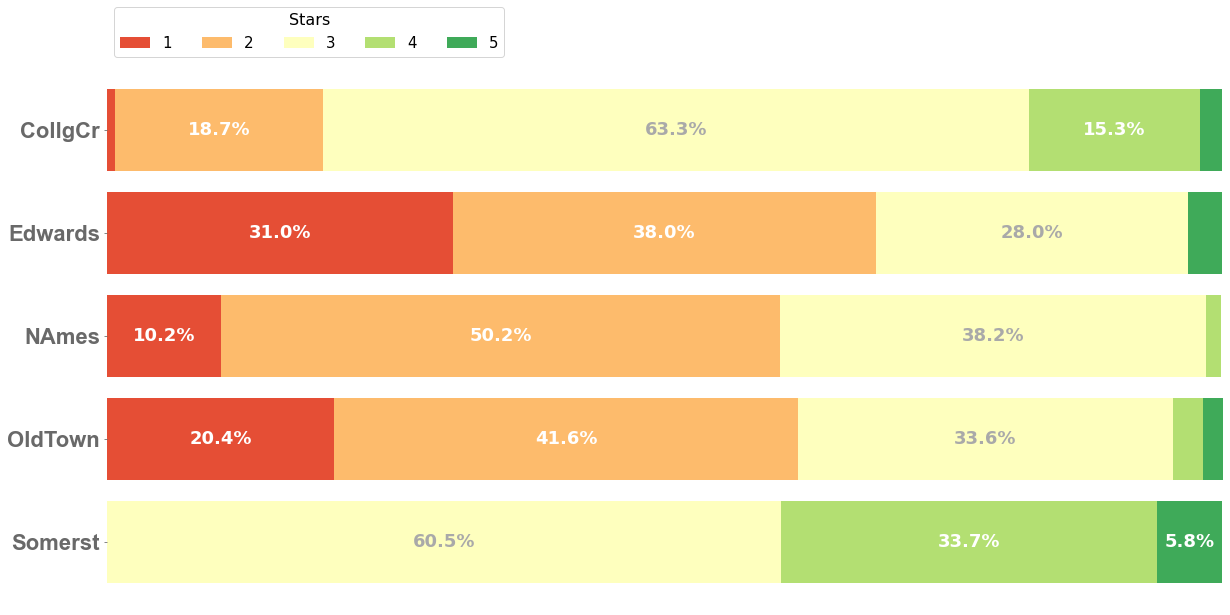

In [5]:
from skeleton.plots.barplots import plot_percentage_per_subcategory

primary='Neighborhood'
secondary='Stars'
 
popular_neighborhoods = boston.groupby('Neighborhood').Id.count() #.index
popular_neighborhoods = popular_neighborhoods[popular_neighborhoods > 80].index

df = (boston
    .loc[lambda df: df.Neighborhood.isin(popular_neighborhoods)]
    .assign(Stars = lambda df: df.OverallQual.replace({2:1,3:1,4:1,5:2,6:3,7:3,8:4,9:5,10:5}))
    
) 

    
plot_percentage_per_subcategory(df,primary,secondary);